### Importing requirements

In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv


### Setting up the dataframe for EDA

In [2]:
df=pd.read_csv('bitcoin_price.csv')
df

,Open,High,Low,Close
0,2763.24,2889.62,2720.61,2875.34
1,2724.39,2758.53,2644.85,2757.18
2,2807.02,2808.76,2692.80,2726.45
3,2679.73,2897.45,2679.73,2809.01
4,2538.71,2693.32,2529.34,2671.78
...,...,...,...,...
1551,116.38,125.60,92.28,105.21
1552,139.00,139.89,107.72,116.99
1553,144.00,146.93,134.05,139.00
1554,134.44,147.49,134.00,144.54


In [3]:
# Drop irrelevant values
df.drop(columns=['Date', 'Volume', 'Market Cap'], inplace=True)

KeyError: "['Date', 'Volume', 'Market Cap'] not found in axis"

In [ ]:
# Check total values in dataset
df.shape

(1556, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1556 non-null   float64
 1   High    1556 non-null   float64
 2   Low     1556 non-null   float64
 3   Close   1556 non-null   float64
dtypes: float64(4)
memory usage: 48.8 KB


In [ ]:
df.head()

,Open,High,Low,Close
0,2763.24,2889.62,2720.61,2875.34
1,2724.39,2758.53,2644.85,2757.18
2,2807.02,2808.76,2692.80,2726.45
3,2679.73,2897.45,2679.73,2809.01
4,2538.71,2693.32,2529.34,2671.78


In [ ]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [ ]:
df.dtypes   

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [ ]:
# Check if columns have empty values
df.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
# Check duplicated values and its total
df.duplicated().sum()   

0

In [ ]:
# Print unique values
print("\nUnique Values in All Columns:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")


Unique Values in All Columns:
Open: 1529 unique values
High: 1527 unique values
Low: 1539 unique values
Close: 1529 unique values


### Count plots for non-numerical and numerical columns

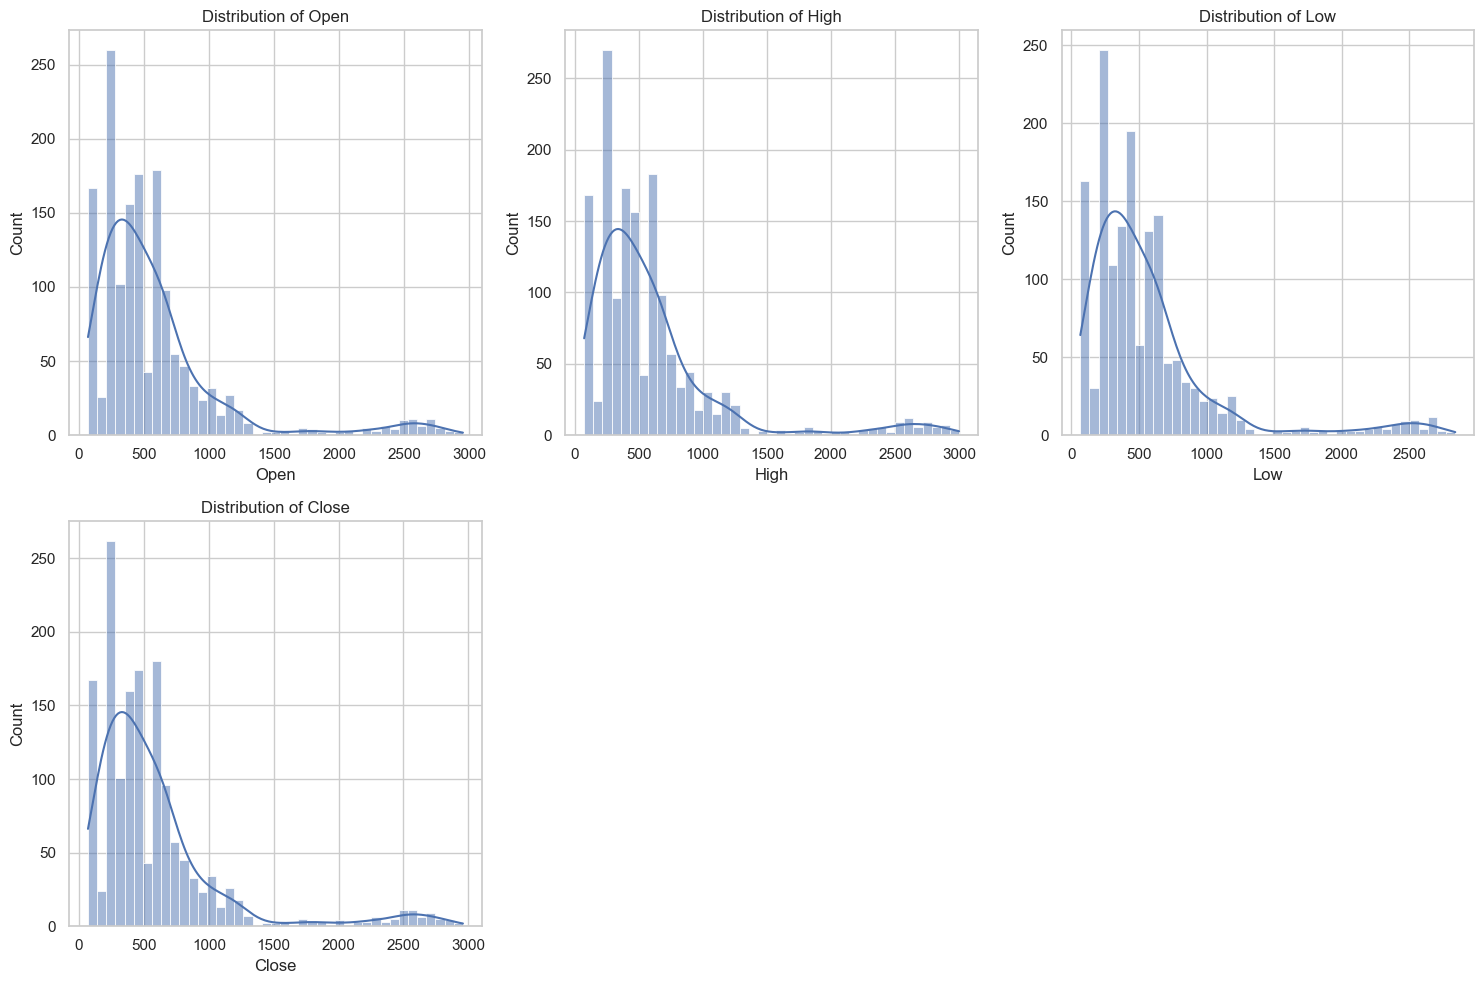

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create count plot subplots for each numerical column
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

### Training Creating the Model

In [ ]:
# Split the dataset for input and output
X = df[['Open','High','Low']]
y = df['Close']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [ ]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [ ]:
# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.99966233631482


In [ ]:
# Evaluate using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 69.17218835717675


                                             |          | [  0%]   00:00 -> (? left)


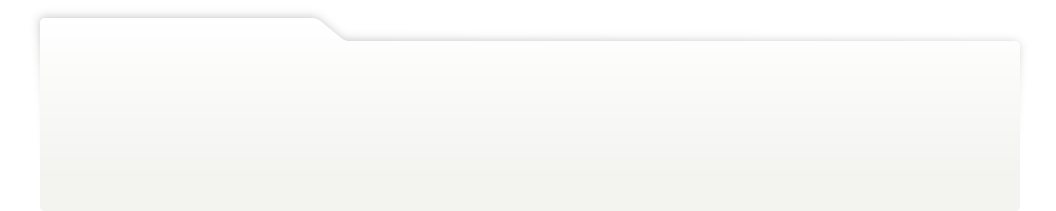
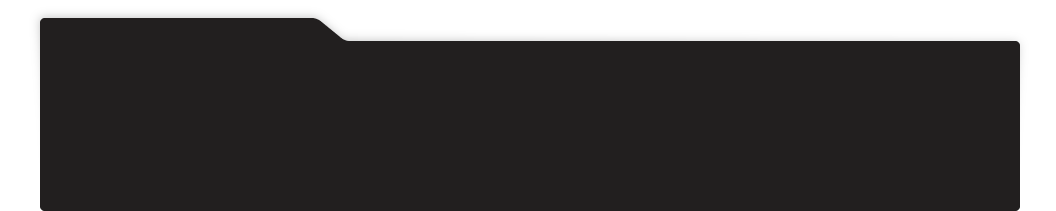
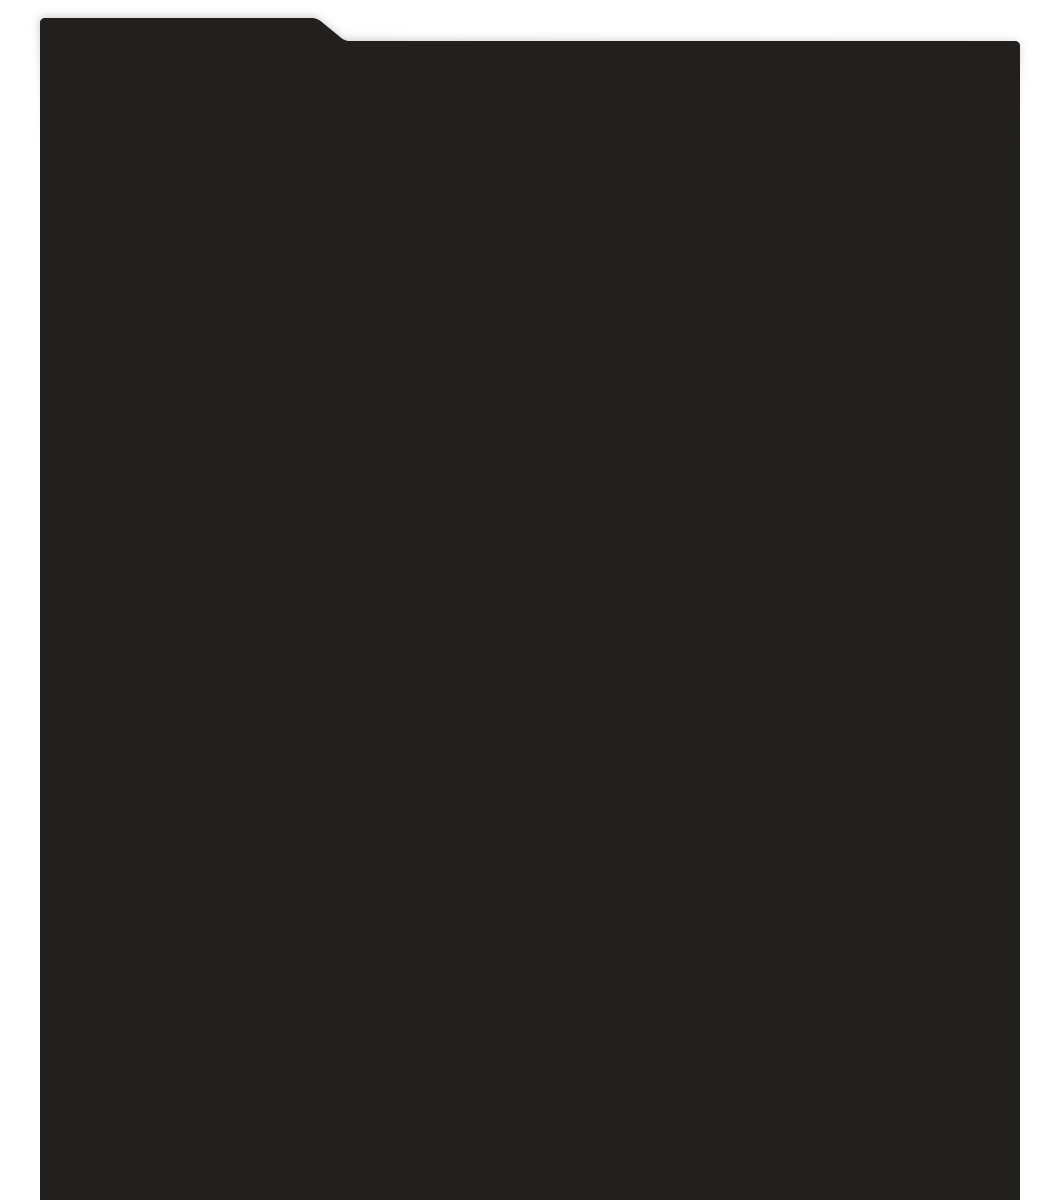
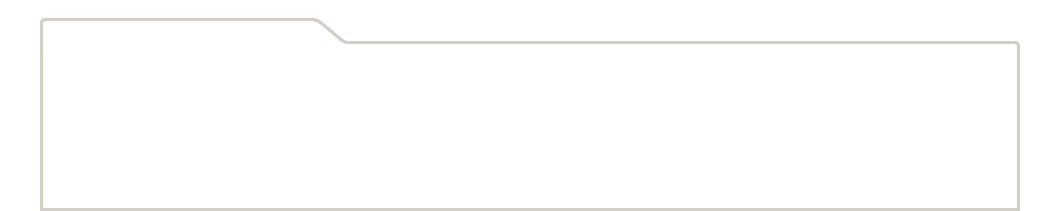
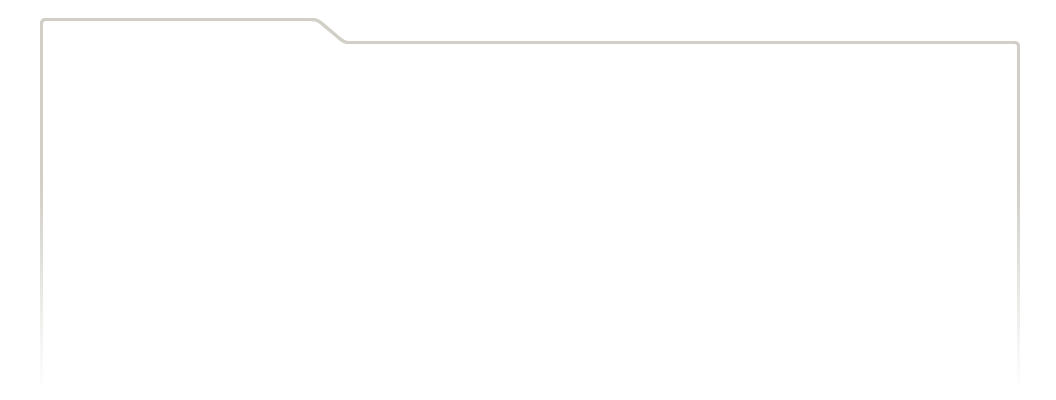
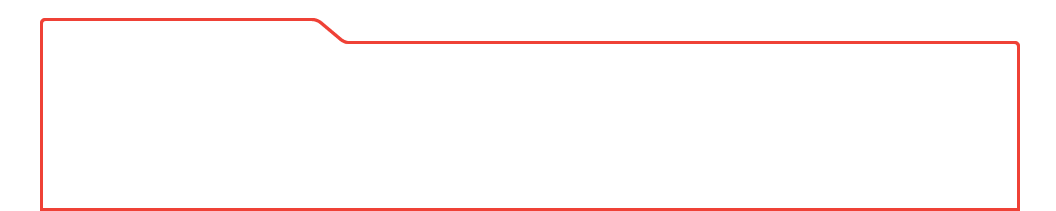
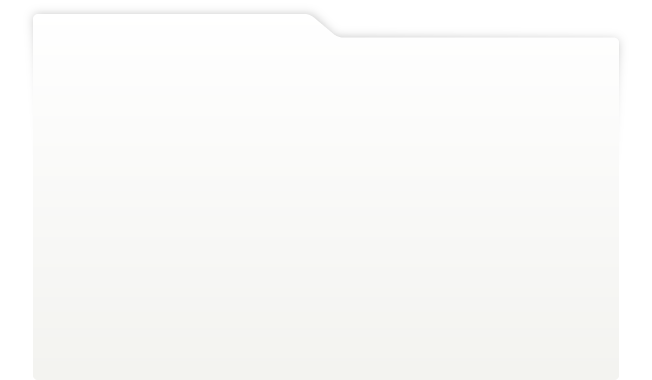
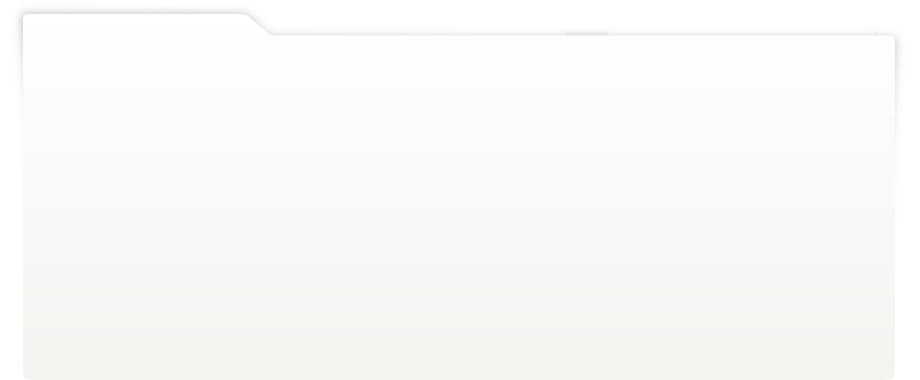
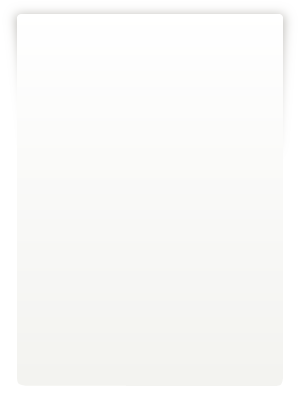
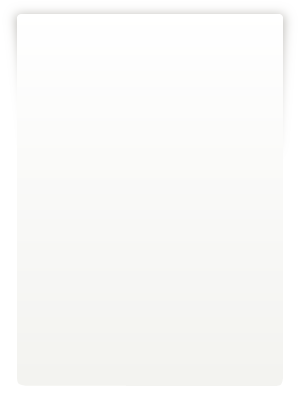
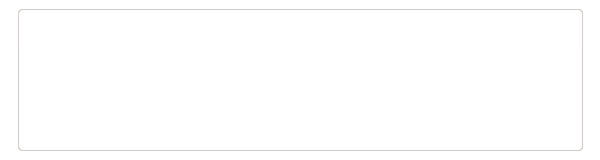
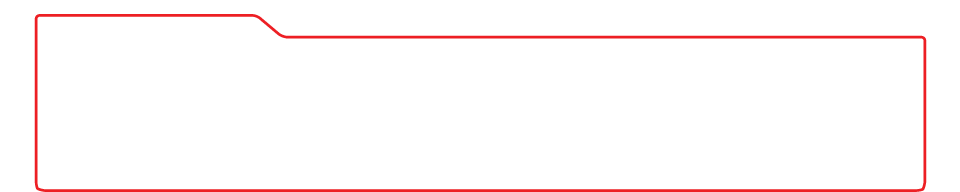
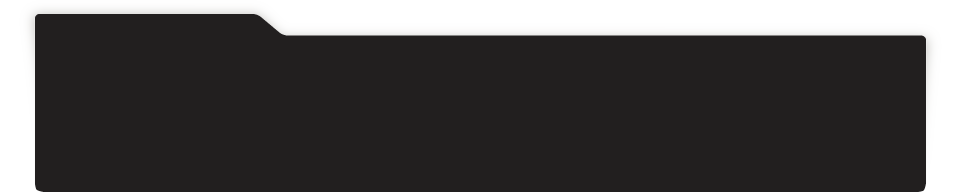
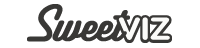
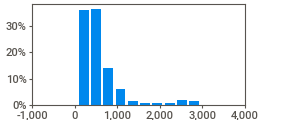
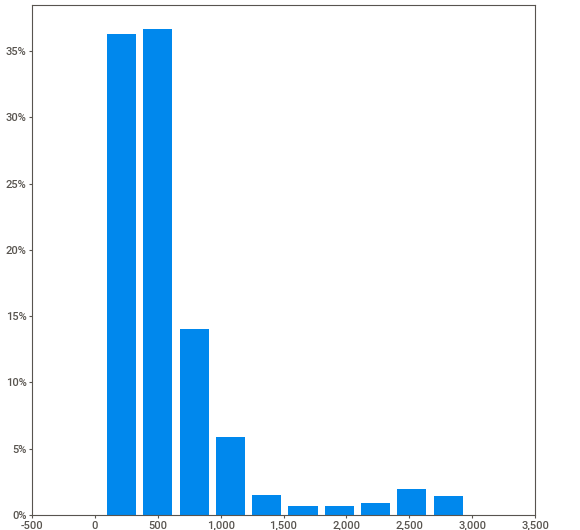
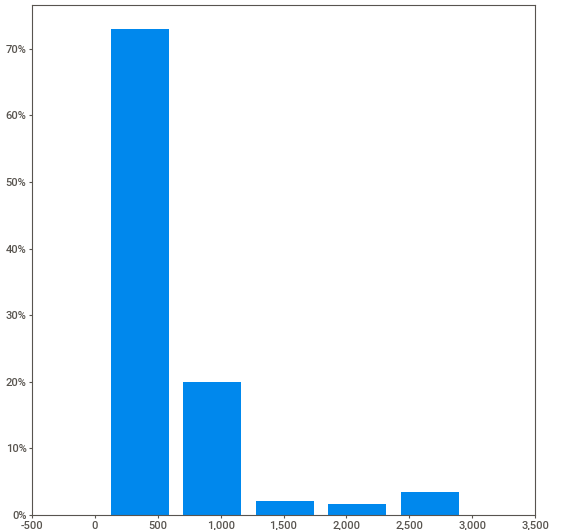
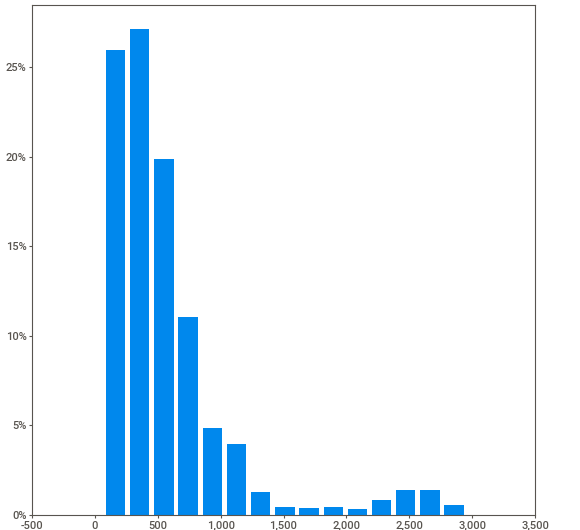
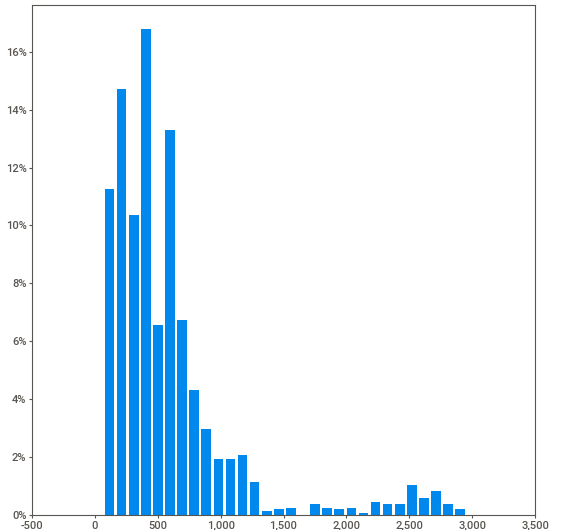
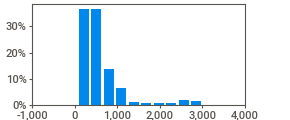
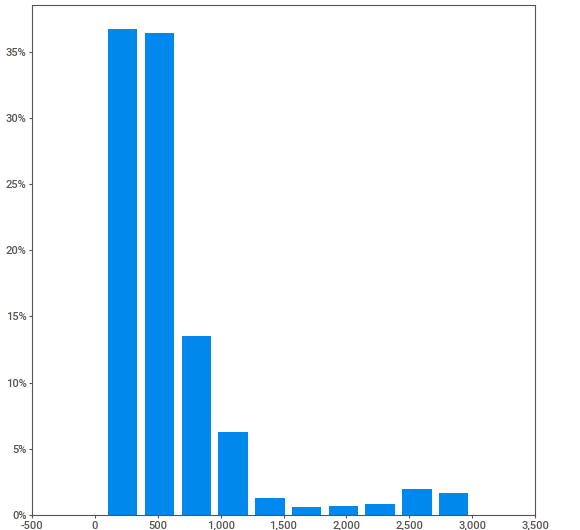
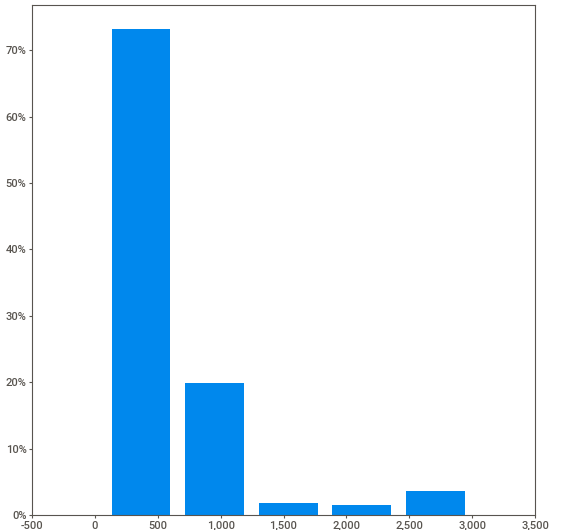
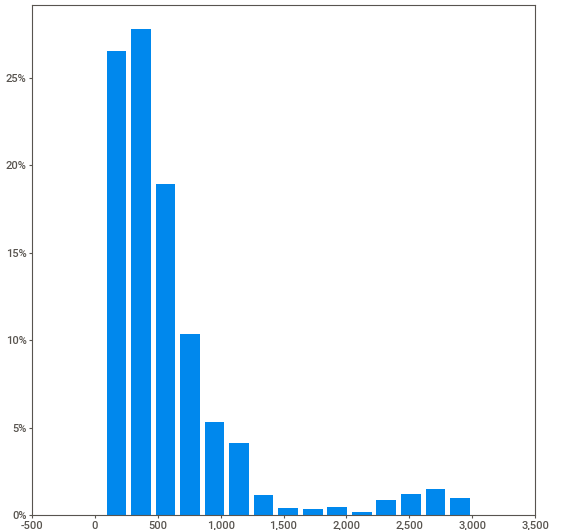
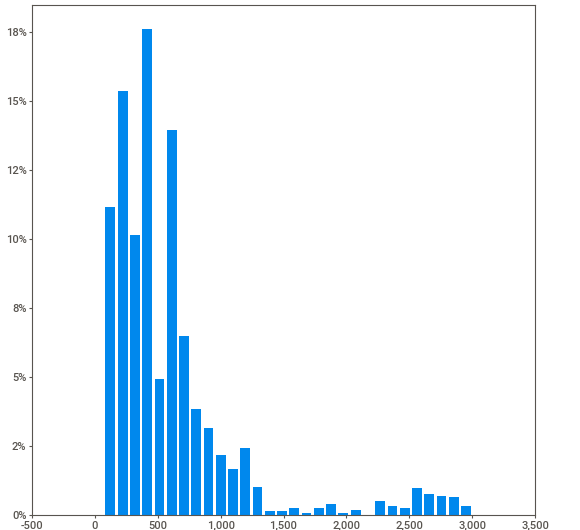
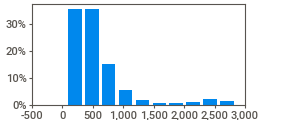
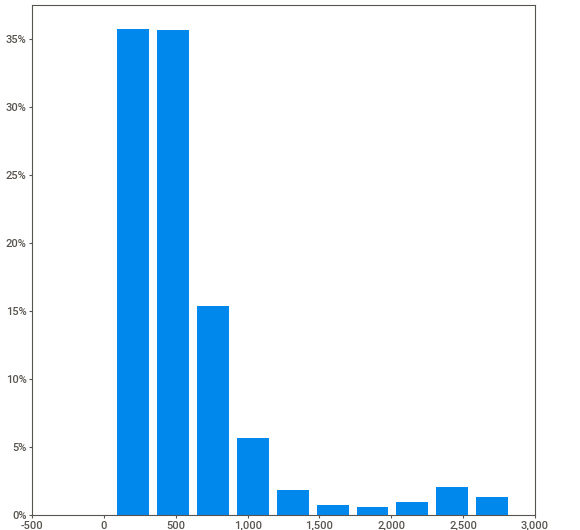
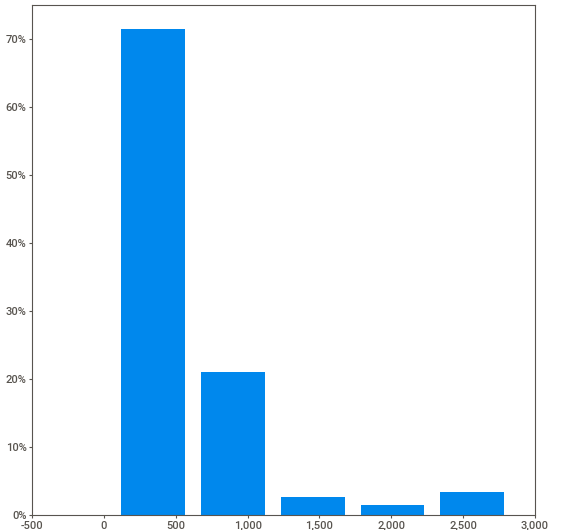
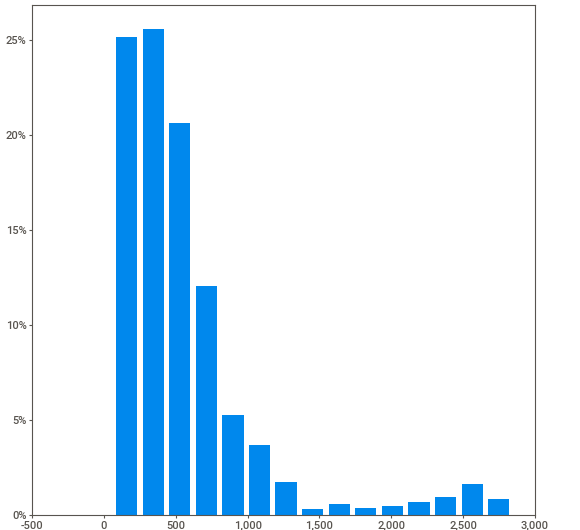
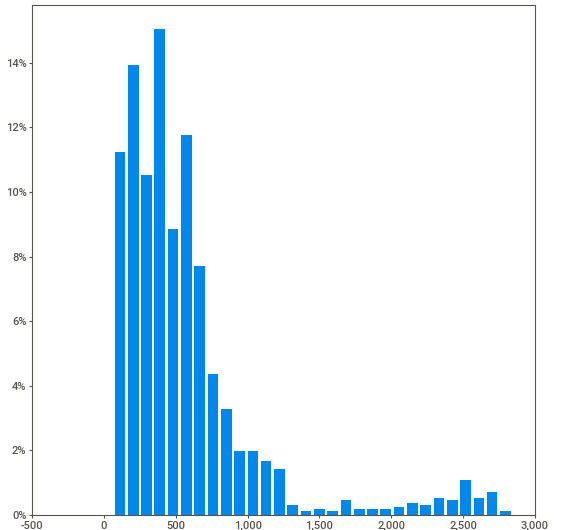
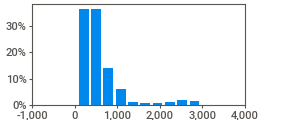
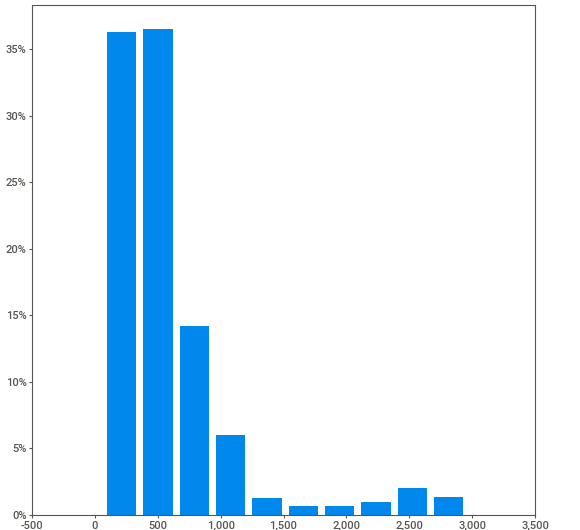
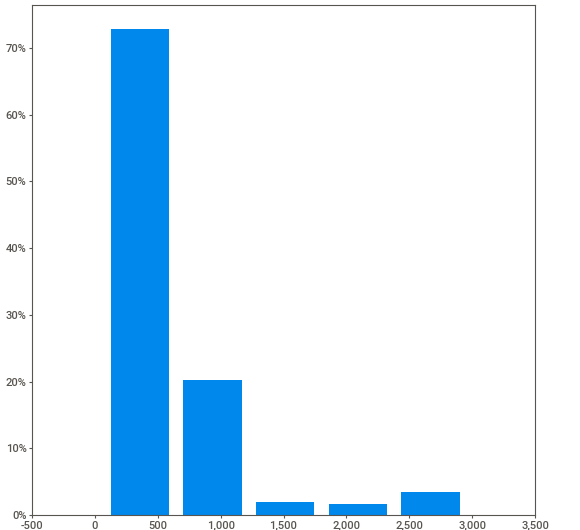
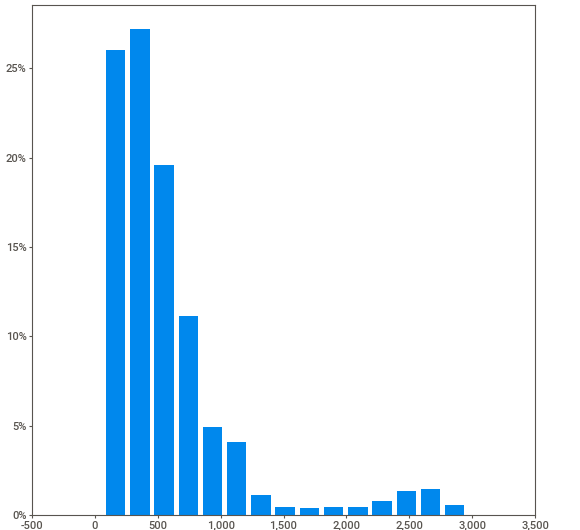
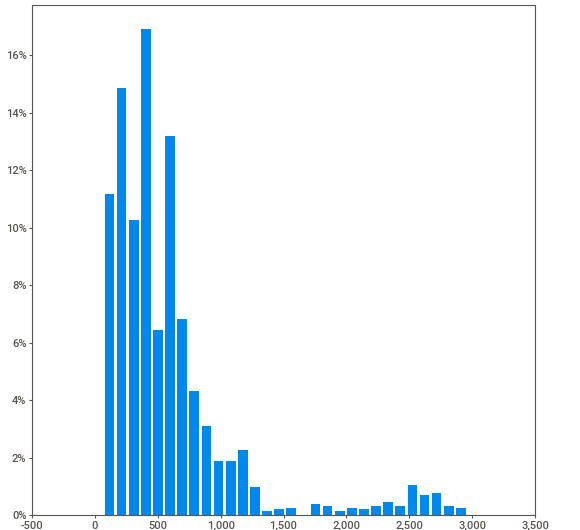
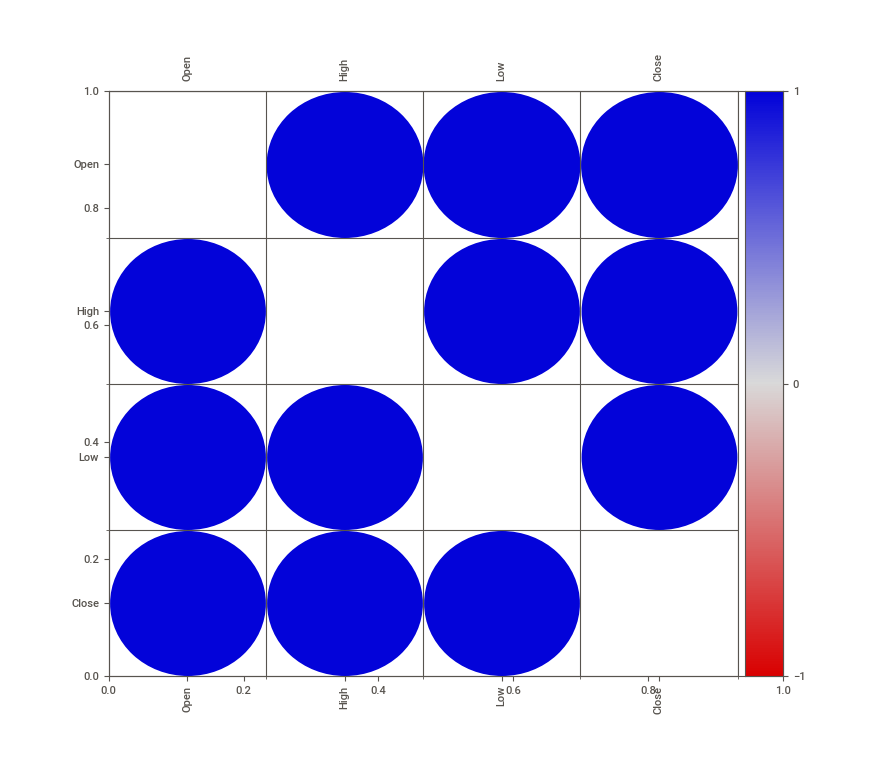
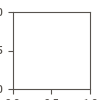

In [4]:
advert_report = sv.analyze(df)
advert_report.show_notebook()